In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys

sys.path.insert(0,'./src/')

from models import Repressilator
from time import time
from tabulate import tabulate

# notations

## species
for $i=1,2,3$
- mRNA $M_i$
- protein $P_i$

## reactions

the reactions are called 
1. mRNA transcription
2. protein translation
3. protein degradation
4. mRNA degradation

$$
G_i \to \xrightarrow{\alpha_0 + \alpha K^n/(K^n+P_j^n)} M_i, \quad M_i \xrightarrow{\beta} M_i + P_i, \quad P_i \xrightarrow{\beta} \empty, \quad M_i\xrightarrow{\gamma} \empty
$$
where $j = i-1$ in the sense of $\mod 3$. 

## PARAMETERS

In [2]:
alpha0 = 1
alpha = 1000
n = 2
K = 20
beta = 5
gamma = 1

model_parameter = np.array([alpha0,alpha,n,K,beta,gamma])

def parameter2string(model_parameter):
    names = ['alpha0','alpha','n','K','beta','gamma']
    return ', '.join([ name + '=' + str(val)  for name,val in zip(names,model_parameter)])

## Initial Conditions

In [3]:
X_init = np.array([0,0,0,40,20,60])

## Build the model

In [4]:
model = Repressilator(model_parameter)

average time cost for a gilespie simulation is  2.45 seconds


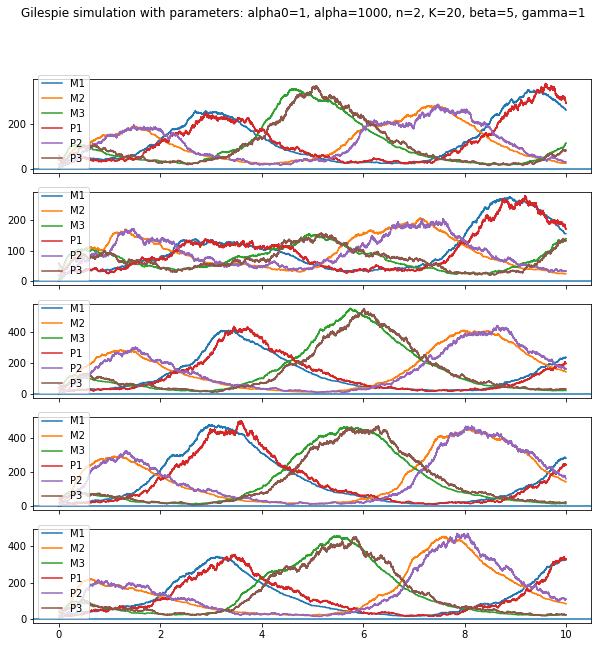

In [5]:
fig, axes = plt.subplots(5,1,sharex=True,figsize=(10,10))
computation_cost_time = []
for j in range(5):

    start = time()
    x,r,t = model.gilespie(X_init,10)
    computation_cost_time.append(time()-start)

    for i in range(6):
        axes[j].plot(t,x[:,i],label=model.chemicals[i])

    axes[j].axhline(0)
    axes[j].legend()
fig.suptitle('Gilespie simulation with parameters: ' + parameter2string(model_parameter))
print('average time cost for a gilespie simulation is ', 
    "{:.2f}".format(np.mean(computation_cost_time)), 
    'seconds')

time cost for levels of tau-leaping simulations are
     tau     time
--------  -------
0.01       0.0467
0.005      0.0902
0.0025     0.181
0.00125    0.357
0.000625   0.838
0.000313   1.5
0.000156   3.01
7.81e-05   5.95
3.91e-05  12
1.95e-05  24.7


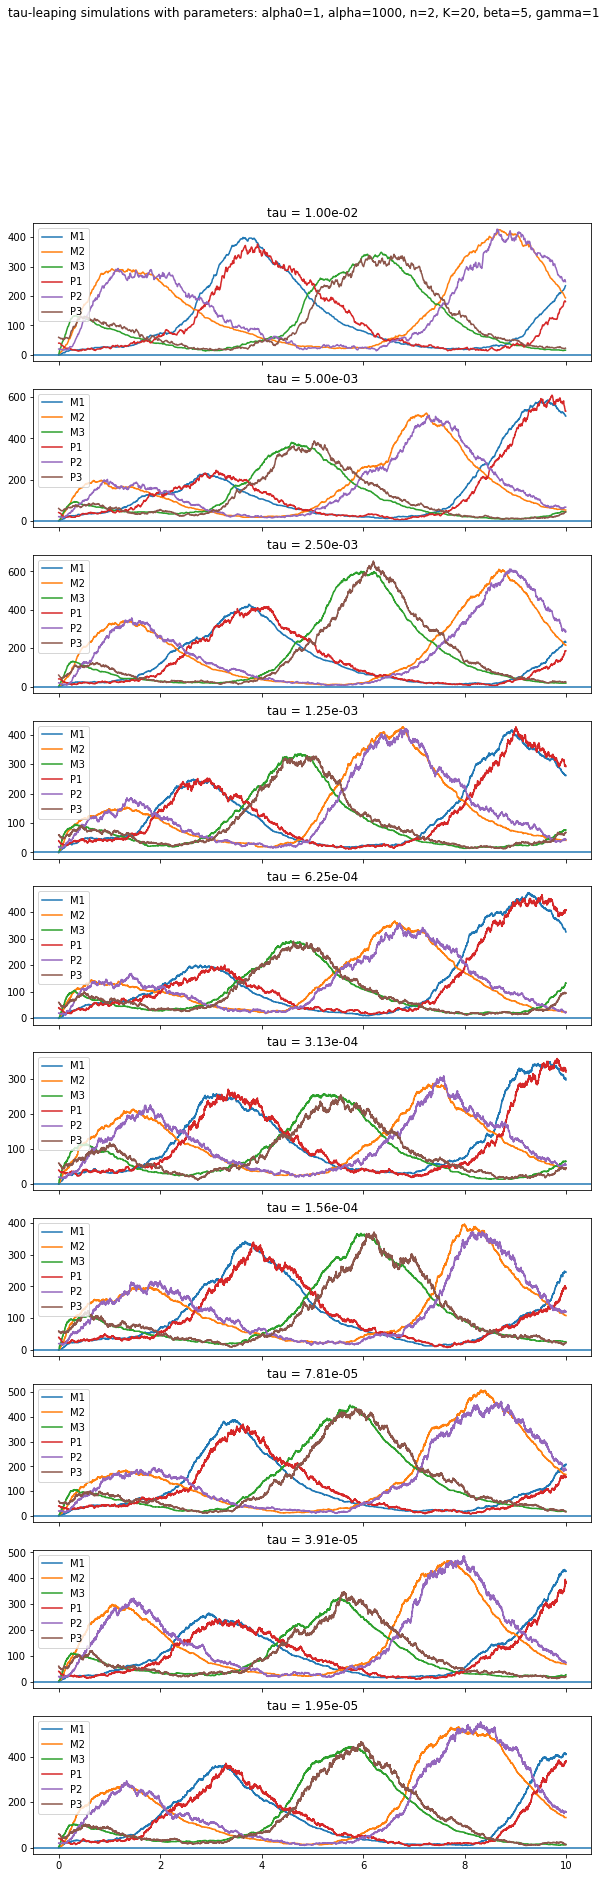

In [6]:
fig, axes = plt.subplots(10,1,sharex=True,figsize=(10,30))
computation_cost_time = []
taus = []
for j in range(10):

    tau = 2**(-j)*0.01
    taus.append(tau)
    start = time()
    x,r,t = model.tau_leaping(X_init,tau,10)
    computation_cost_time.append(time()-start)

    for i in range(6):
        axes[j].plot(t,x[:,i],label=model.chemicals[i])
    axes[j].set_title('tau = ' + '{:.2e}'.format(tau))
    axes[j].axhline(0)
    axes[j].legend()

fig.suptitle('tau-leaping simulations with parameters: ' + parameter2string(model_parameter))
print('time cost for levels of tau-leaping simulations are')
print(tabulate(
    [("{:.2e}".format(a), "{:.2e}".format(b)) for a,b in zip(taus,computation_cost_time)],
    headers=['tau','time']))

it can be seen that around level 5 with $\tau = 3e-4$ we would have the computation cost is same as the Gilespie simulation. No we do a few more simulation of with this tau and see how it compare to the Gilespie. 

average computation time is  1.49  seconds


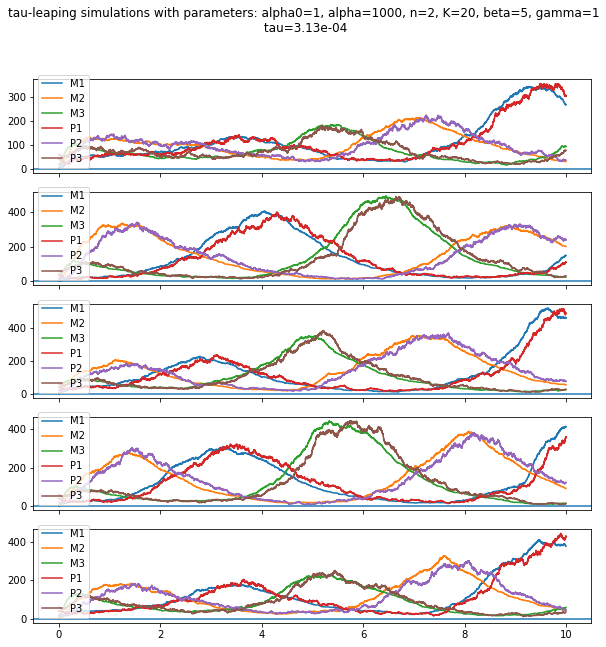

In [10]:
fig, axes = plt.subplots(5,1,sharex=True,figsize=(10,10))
computation_cost_time = []
tau = taus[5]
for j in range(5):

    start = time()
    x,r,t = model.tau_leaping(X_init,tau,10)
    computation_cost_time.append(time()-start)

    for i in range(6):
        axes[j].plot(t,x[:,i],label=model.chemicals[i])
    axes[j].axhline(0)
    axes[j].legend()

fig.suptitle('tau-leaping simulations with parameters: ' 
    + parameter2string(model_parameter) + '\n ' 
    + 'tau=' + '{:.2e}'.format(tau))
print('average computation time is ', '{:.2f}'.format(np.mean(computation_cost_time)), ' seconds')

Looks pretty similar to me. 